# Timescales vs $a$ vs $T_\mathrm{J}$

In [9]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, matplotlib

%matplotlib inline 

import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

In [10]:
plt.rc('font', family='serif')
plt.rc('text', usetex=True)

d = pd.read_csv('../data/granvik.dat', delim_whitespace=True, names=['description', 'a (AU)', 'e', 'i (deg)', \
                                                    'node (deg)', 'peri (deg)', 'MA (deg)', 'q (AU)', 'Q (AU)', \
                                                      'formation-Crifo (yr)', 'dispersion-Crifo (yr)', 'visible-Crifo (yr)', \
                                                      'formation-grav (yr)', 'dispersion-grav (yr)', 'visible-grav (yr)'])

In [11]:
def tj(a, e, i):
    return 5.2/a + 2*np.sqrt((1-e**2)*a/5.2)*np.cos(np.deg2rad(i))

tj = tj(d['a (AU)'], d['e'], d['i (deg)'])

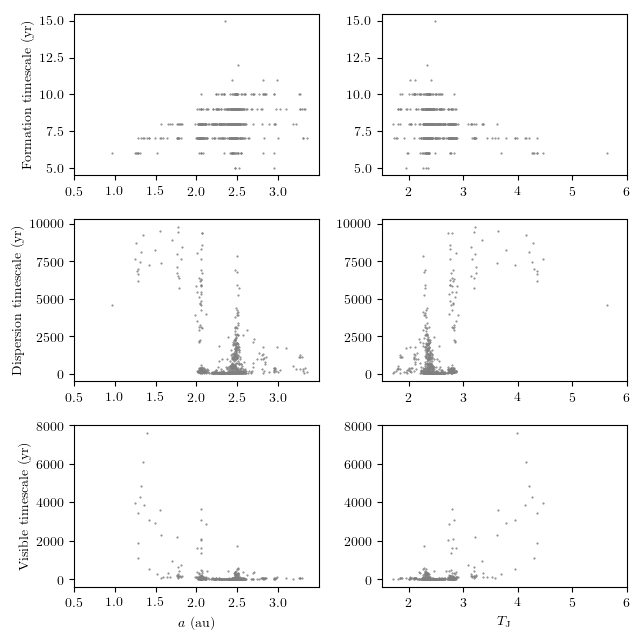

In [12]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
plt.rc('font', family='serif')
plt.rc('text', usetex=True)

f, ax = plt.subplots(3, 2, figsize=(6.5, 6.5))

ax[0][0].plot(d['a (AU)'], d['formation-grav (yr)'], '.', markersize=1, color='gray')
ax[0][0].set_ylabel('Formation timescale (yr)')
ax[0][0].set_xlim([0.9, 3.5])
ax[0][0].set_xticks(np.arange(0.5, 3.5, step=0.5))

ax[0][1].plot(tj, d['formation-grav (yr)'], '.', markersize=1, color='gray')
ax[0][1].set_xlim([1.5, 6.0])

ax[1][0].plot(d['a (AU)'], d['dispersion-grav (yr)'], '.', markersize=1, color='gray')
ax[1][0].set_ylabel('Dispersion timescale (yr)')
ax[1][0].set_xlim([0.9, 3.5])
ax[1][0].set_xticks(np.arange(0.5, 3.5, step=0.5))

ax[1][1].plot(tj, d['dispersion-grav (yr)'], '.', markersize=1, color='gray')
ax[1][1].set_xlim([1.5, 6.0])

ax[2][0].plot(d['a (AU)'], d['visible-grav (yr)'], '.', markersize=1, color='gray')
ax[2][0].set_xlabel('$a$ (au)')
ax[2][0].set_ylabel('Visible timescale (yr)')
ax[2][0].set_xlim([0.9, 3.5])
ax[2][0].set_xticks(np.arange(0.5, 3.5, step=0.5))

ax[2][1].plot(tj, d['visible-grav (yr)'], '.', markersize=1, color='gray')
ax[2][1].set_xlabel(r'$T_\mathrm{J}$')
ax[2][1].set_xlim([1.5, 6.0])

f.tight_layout()
plt.savefig('time-a-tj.pdf')
plt.show()